- 행정구역별 반려동물 보유 가구 수
- 데이터 파일명 : 가구원수별_반려동물_보유_유형별가구시도_20240809190525.xlsx

In [8]:
import pandas as pd

# 데이터 로드
DATA_PATH = "../data"
df1 = pd.read_excel(f"{DATA_PATH}/가구원수별_반려동물_보유_유형별가구시도_20240809190525.xlsx")

df1.head()

,행정구역별(시도),가구원수,가구-계,반려동물미보유가구-계,반려동물보유가구-계,단일-계,단일-개,단일-고양이,단일-기타,복합-계,복합-개+고양이,복합-개+기타,복합-고양이+기타,복합-개+고양이+기타
0,전국,계,20926710,17797748,3128962,2970999,2268514,571045,131440,157963,139644,11787,3060,3472
1,전국,1인가구,6643354,5993303,650051,622613,449209,152508,20896,27438,24283,2018,595,542
2,전국,2인가구,5865741,4916304,949437,900537,721624,156422,22491,48900,43438,3856,647,959
3,전국,3인가구,4201497,3426872,774625,735702,572542,130923,32237,38923,34824,2623,660,816
4,전국,4인가구,3268910,2694599,574311,544270,400483,101453,42334,30041,26247,2181,865,748


C:\Users\gani\AppData\Local\Temp\ipykernel_8184\1402905200.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='반려동물보유가구-계', y='행정구역별(시도)', data=df_plot1, palette='viridis')


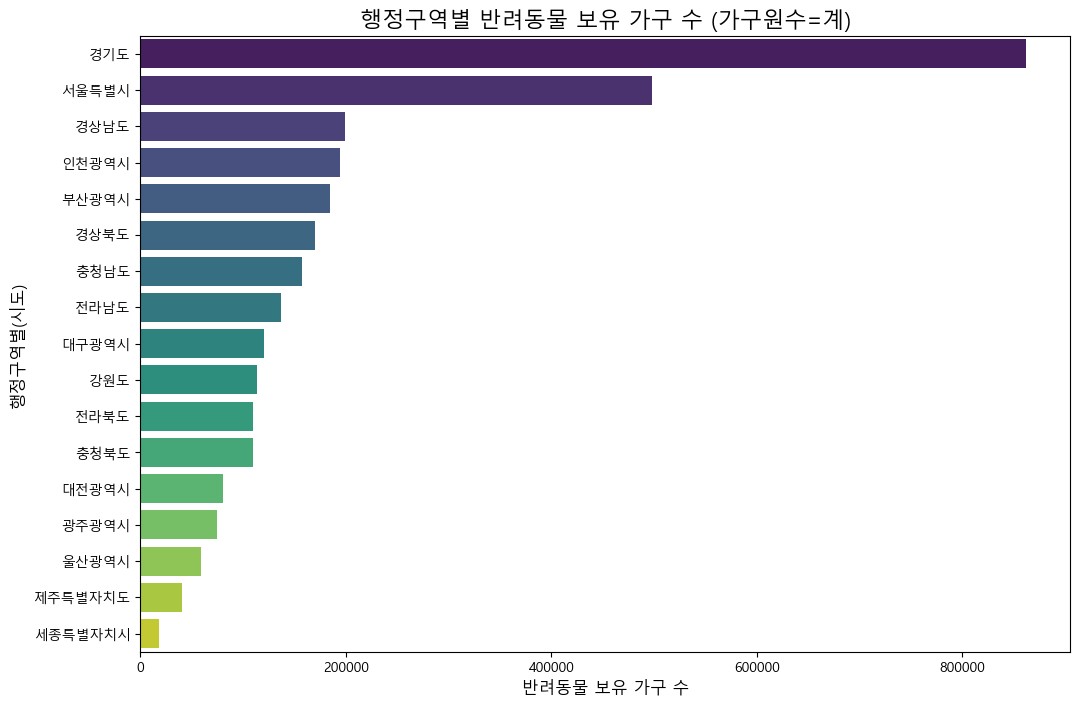

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')  # Windows

# '전국', '동부', '읍부', '면부'를 제외한 데이터 필터링
df_filtered1 = df1[(df1['가구원수'] == '계') &
                 (~df1['행정구역별(시도)'].isin(['전국', '동부', '읍부', '면부']))]

# '행정구역별(시도)'와 '반려동물보유가구-계' 열만 선택
df_plot1 = df_filtered1[['행정구역별(시도)', '반려동물보유가구-계']]

# '반려동물보유가구-계' 값에 따라 내림차순으로 정렬
df_plot1 = df_plot1.sort_values(by='반려동물보유가구-계', ascending=False)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='반려동물보유가구-계', y='행정구역별(시도)', data=df_plot1, palette='viridis')

# 그래프 제목 및 레이블 설정
plt.title('행정구역별 반려동물 보유 가구 수 (가구원수=계)', fontsize=16)
plt.xlabel('반려동물 보유 가구 수', fontsize=12)
plt.ylabel('행정구역별(시도)', fontsize=12)
plt.show()

In [6]:
!pip install seaborn

                                              0.0/294.9 kB ? eta -:--:--
     -----------------------------------   286.7/294.9 kB 18.4 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00


- 충남 가구원수별 반려동물 보유 가구 수

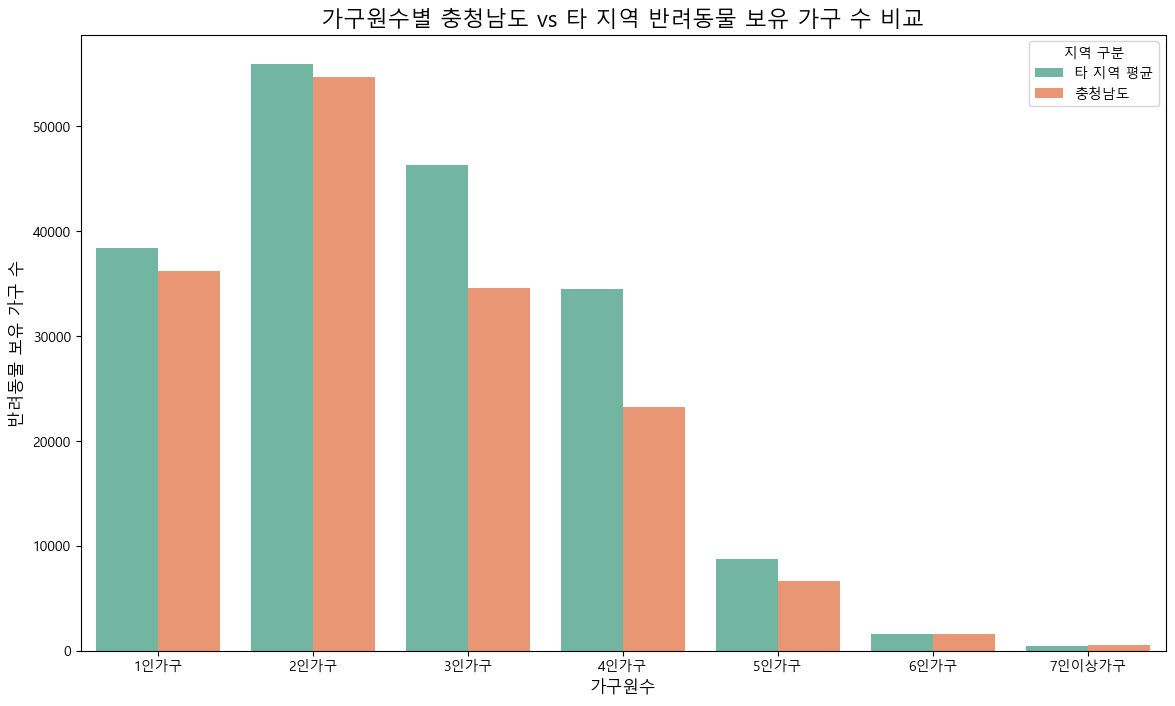

In [12]:
# '전국', '동부', '읍부', '면부'를 제외한 데이터 필터링
df_filtered2 = df1[(df1['가구원수'].isin(['1인가구', '2인가구', '3인가구', '4인가구', '5인가구', '6인가구', '7인이상가구'])) &
                 (~df1['행정구역별(시도)'].isin(['전국', '동부', '읍부', '면부']))]

# 충청남도의 데이터 필터링
df_chungnam = df_filtered2[df_filtered2['행정구역별(시도)'] == '충청남도']

# 타 지역 (충청남도를 제외한) 평균 계산
df_other_regions_avg = df_filtered2[df_filtered2['행정구역별(시도)'] != '충청남도'].groupby('가구원수')['반려동물보유가구-계'].mean().reset_index()

# 충청남도와 타 지역 평균을 비교할 수 있도록 데이터 결합
df_other_regions_avg['행정구역별(시도)'] = '타 지역 평균'
df_chungnam_avg = df_chungnam.groupby('가구원수')['반려동물보유가구-계'].mean().reset_index()
df_chungnam_avg['행정구역별(시도)'] = '충청남도'

# 두 데이터프레임 결합
df_combined = pd.concat([df_other_regions_avg, df_chungnam_avg])

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='가구원수', y='반려동물보유가구-계', hue='행정구역별(시도)', data=df_combined, palette='Set2')

# 그래프 제목 및 레이블 설정
plt.title('가구원수별 충청남도 vs 타 지역 반려동물 보유 가구 수 비교', fontsize=16)
plt.xlabel('가구원수', fontsize=12)
plt.ylabel('반려동물 보유 가구 수', fontsize=12)
plt.legend(title='지역 구분')
plt.show()


- 전국 반려동물 관련 사업 현황
- 데이터 파일명 : 농림축산식품부 총 4개

In [17]:
# 데이터 로드
beauty_df = pd.read_csv(f"{DATA_PATH}/농림축산식품부_반려동물 미용업 현황_20221231.csv", encoding='cp949')
express_df = pd.read_csv(f"{DATA_PATH}/농림축산식품부_반려동물 운송업 현황_20201230.csv", encoding='cp949')
funeral_df = pd.read_csv(f"{DATA_PATH}/농림축산식품부_반려동물 장묘업 현황_12_30_2020.csv", encoding='cp949')
exhibition_df = pd.read_csv(f"{DATA_PATH}/농림축산식품부_반려동물 전시업 현황_20221231.csv", encoding='cp949')

C:\Users\gani\AppData\Local\Temp\ipykernel_8184\995163413.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_sorted, x=region_col, y=company_col, palette='viridis')
C:\Users\gani\AppData\Local\Temp\ipykernel_8184\995163413.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_sorted, x=region_col, y=employee_col, palette='viridis')


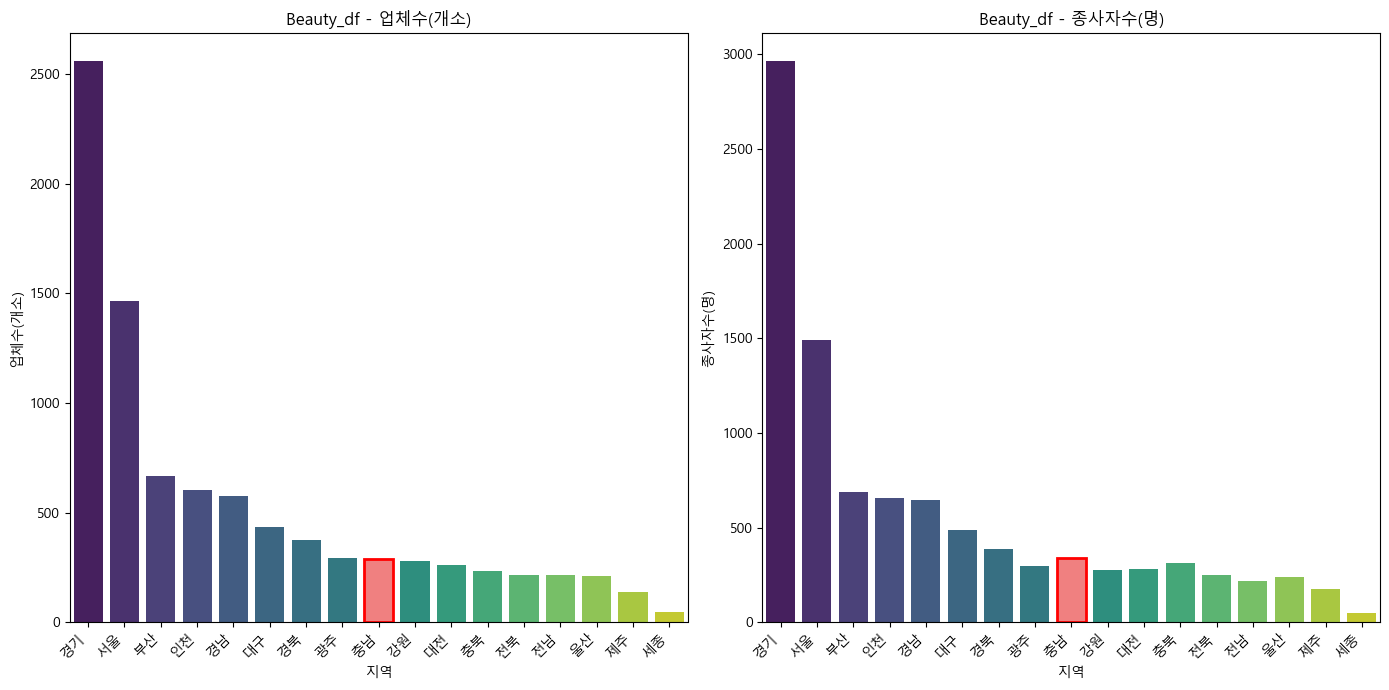

C:\Users\gani\AppData\Local\Temp\ipykernel_8184\995163413.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_sorted, x=region_col, y=company_col, palette='viridis')
C:\Users\gani\AppData\Local\Temp\ipykernel_8184\995163413.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_sorted, x=region_col, y=employee_col, palette='viridis')


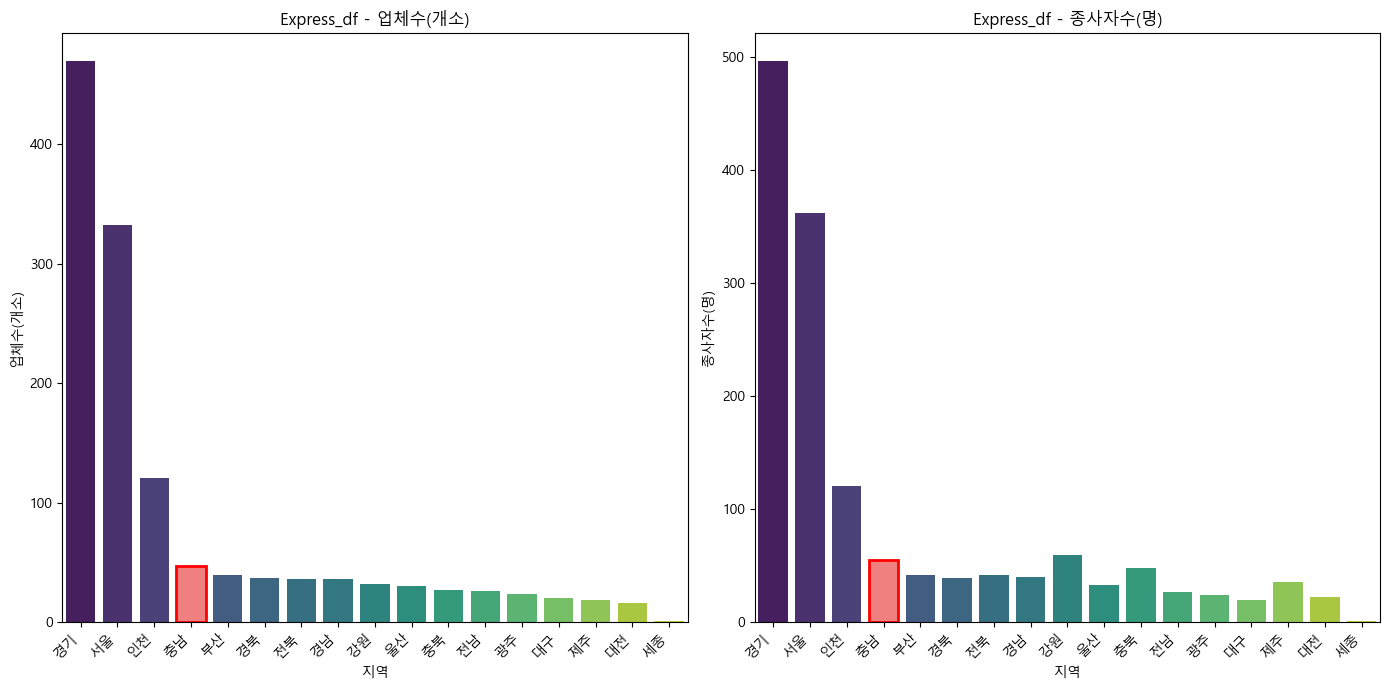

C:\Users\gani\AppData\Local\Temp\ipykernel_8184\995163413.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_sorted, x=region_col, y=company_col, palette='viridis')
C:\Users\gani\AppData\Local\Temp\ipykernel_8184\995163413.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_sorted, x=region_col, y=employee_col, palette='viridis')


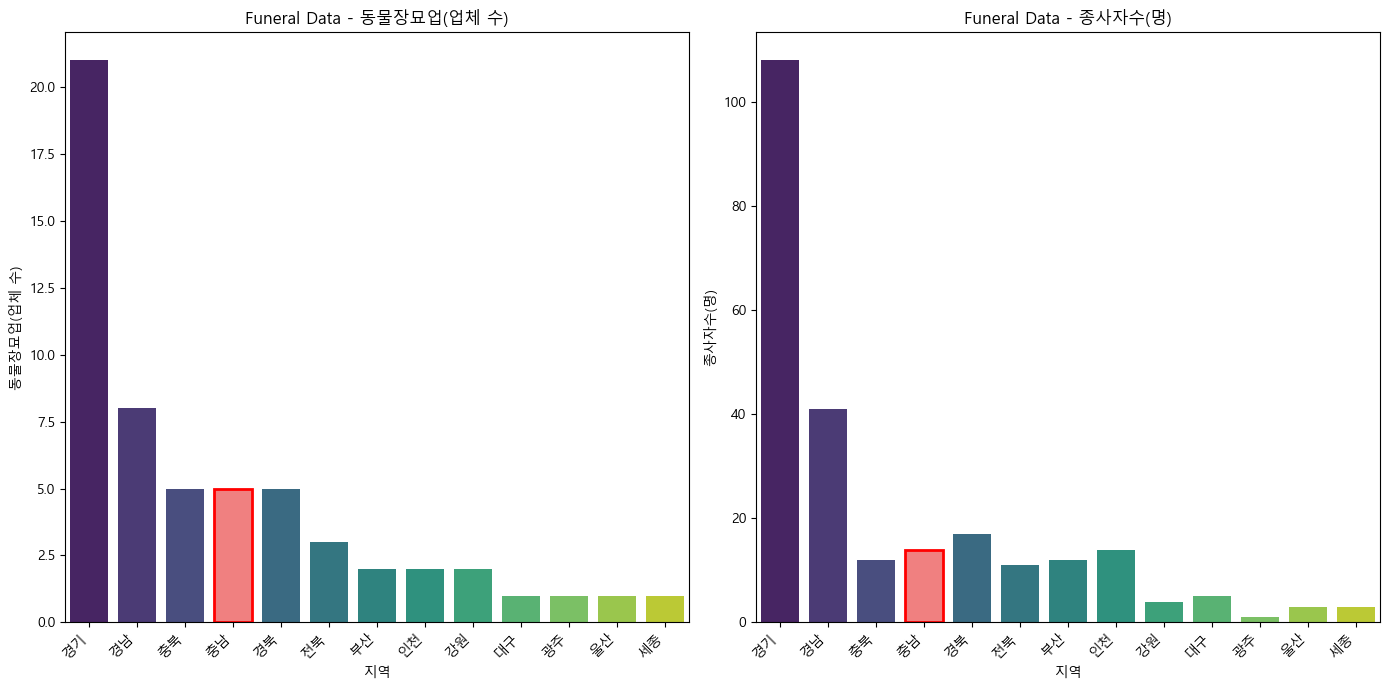

C:\Users\gani\AppData\Local\Temp\ipykernel_8184\995163413.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_sorted, x=region_col, y=company_col, palette='viridis')
C:\Users\gani\AppData\Local\Temp\ipykernel_8184\995163413.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_sorted, x=region_col, y=employee_col, palette='viridis')


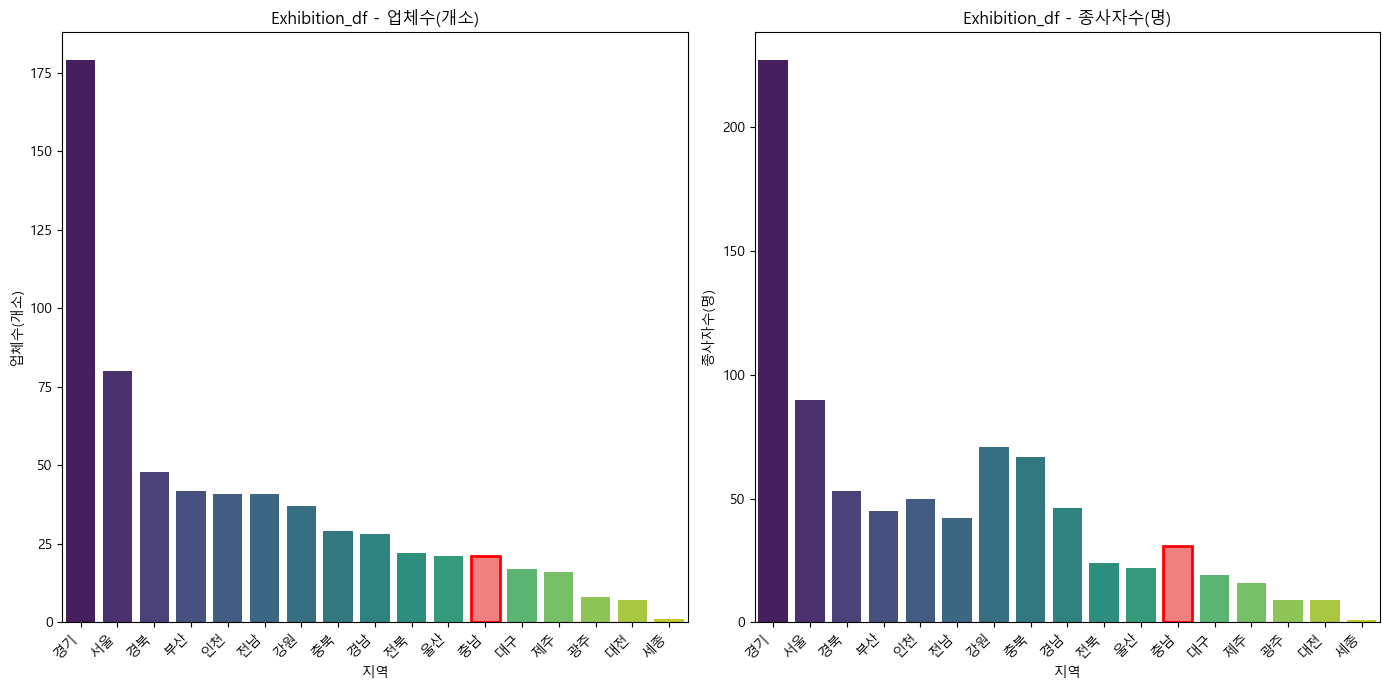

In [18]:
# 데이터프레임 예시 (각 파일의 데이터프레임을 변수로 설정)
dataframes = {
    'beauty_df': beauty_df,
    'express_df': express_df,
    'funeral_df': funeral_df,
    'exhibition_df': exhibition_df
}

def plot_region_data(df, region_col, company_col, employee_col, title, highlight_region):
    # 데이터 정렬
    df_sorted = df.sort_values(by=[company_col], ascending=False)

    plt.figure(figsize=(14, 7))

    # 두 그래프를 하나의 subplot에 그리기
    plt.subplot(1, 2, 1)
    barplot = sns.barplot(data=df_sorted, x=region_col, y=company_col, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{title} - {company_col}')

    # 강조할 지역 표시
    for patch in barplot.patches:
        x_center = patch.get_x() + patch.get_width() / 2
        region = df_sorted.iloc[int(x_center)].get(region_col)
        if region == highlight_region:
            patch.set_edgecolor('red')
            patch.set_linewidth(2)
            patch.set_facecolor('lightcoral')  # 배경 색상 강조

    plt.subplot(1, 2, 2)
    barplot = sns.barplot(data=df_sorted, x=region_col, y=employee_col, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{title} - {employee_col}')

    # 강조할 지역 표시
    for patch in barplot.patches:
        x_center = patch.get_x() + patch.get_width() / 2
        region = df_sorted.iloc[int(x_center)].get(region_col)
        if region == highlight_region:
            patch.set_edgecolor('red')
            patch.set_linewidth(2)
            patch.set_facecolor('lightcoral')  # 배경 색상 강조

    plt.tight_layout()
    plt.show()

# 각 데이터프레임에 대해 시각화 수행
highlight_region = '충남'
for name, df in dataframes.items():
    if name == 'funeral_df':
        plot_region_data(df, '지역', '동물장묘업(업체 수)', '종사자수(명)', 'Funeral Data', highlight_region)
    else:
        plot_region_data(df, '지역', '업체수(개소)', '종사자수(명)', name.capitalize(), highlight_region)
